In [1]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

import jax

from src.simulate_trace import MakeTrace, apply_noise, GaussianAmplitude, PolynomialPhase, MultiPulse, RandomPhase

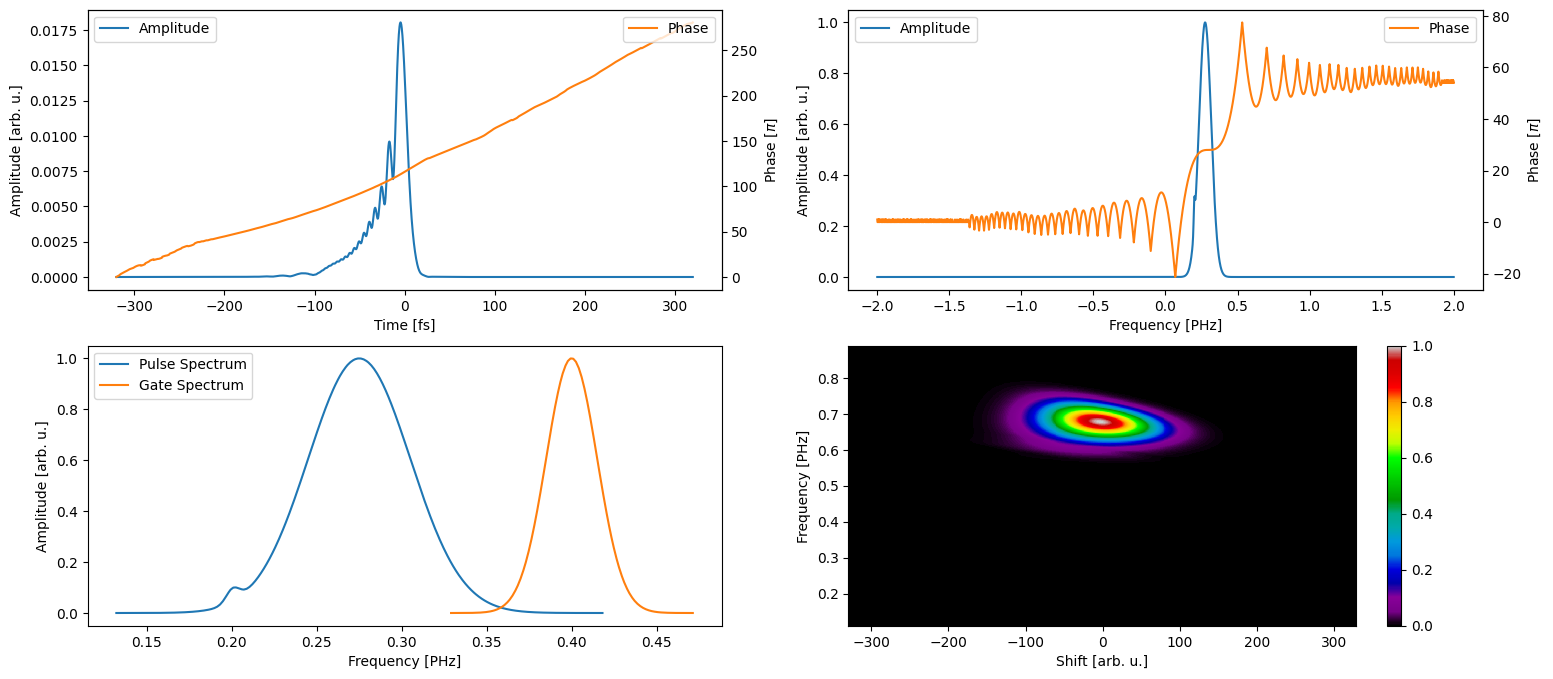

In [2]:

pulse_maker = MakeTrace(N=128*20, Delta_f=2)

central_f = 0.275
phase = PolynomialPhase(0.3, (0,0,0,50))
amp = GaussianAmplitude((1,0.1), (0.275,0.2), (0.1,0.01))
time_inp, pulse_t_inp, frequency_inp, pulse_f_inp = pulse_maker.generate_pulse((amp, phase))


input_pulses = pulse_maker.pulses



central_f = 0.4
phase = PolynomialPhase(central_frequency = central_f, coefficients = np.array([0, 0, -250]))
amp = GaussianAmplitude(central_frequency = central_f, amplitude = 1.0, fwhm = 0.05)
_, _, frequency_gate, pulse_f_gate = pulse_maker.generate_pulse((amp, phase))


delay, frequency, trace, spectra=pulse_maker.generate_frog(time_inp, frequency_inp, pulse_t_inp, pulse_f_inp, "shg", cross_correlation=True,
                                                          gate=(frequency_gate, pulse_f_gate), real_fields=False, interpolate_fft_conform=True,
                                                          N=128*4, scale_time_range=1.5, plot_stuff=True, cut_off_val=0.0001, frequency_range=(0.1,0.9))

In [3]:
from src.frog import COPRA

In [4]:
copra = COPRA(delay, frequency, trace, "shg", cross_correlation="doubleblind")

copra.use_measured_spectrum(spectra.pulse[0], spectra.pulse[1], "pulse")
copra.use_measured_spectrum(spectra.gate[0], spectra.gate[1], "gate")

copra.local_gamma = 1
copra.global_gamma = 0.5

population = copra.create_initial_population(5, "random")

final_result = copra.run(population, 5, 5)